In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
mAP = []
R1 = []
Lambda = []

In [3]:
file = open('train_bg_384_0.log','r')
textline = file.readline()
while textline != '':
    data = textline.split(':')
    if 'mAP' in textline:
        value = float(re.findall(r"\d*\.\d+", data[-1])[0])
        #print(f'mAP = {value}%')
        mAP.append(value)
    elif 'Rank-1 ' in textline:
        value = float(re.findall(r"\d*\.\d+", data[-1])[0])
        R1.append(value)
        #print(f'R1 = {value}%')
    elif 'Lambda' in textline:
        value = float(re.findall(r"\d*\.\d+", data[-1])[0])
        Lambda.append(value)
        #print(f'lambda = {value}')
        
    textline = file.readline()
    
file.close()


In [4]:
import numpy as np
mAP = np.array(mAP)
R1 = np.array(R1)
Lambda = np.array(Lambda)

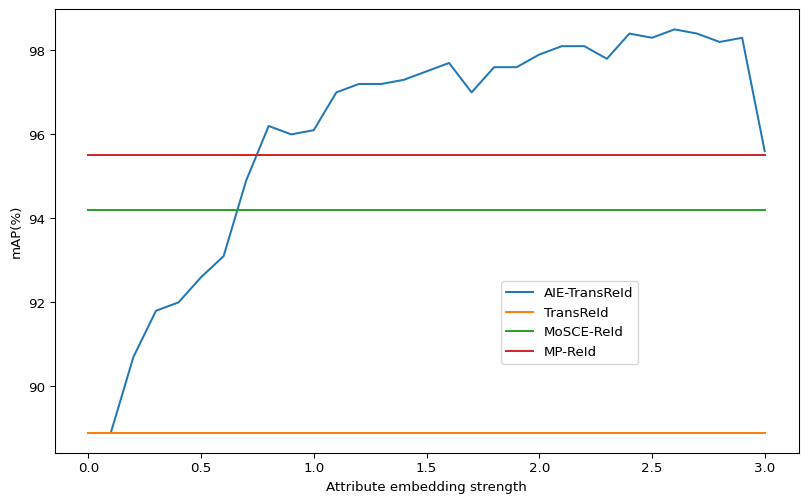

In [5]:
plt.figure(figsize=(10,6), dpi=96)
plt.plot(Lambda[:30], mAP[:30], label='AIE-TransReId')
plt.plot([0, 3], [88.9, 88.9], label='TransReId')
plt.plot([0, 3], [94.2, 94.2], label='MoSCE-ReId')
plt.plot([0, 3], [95.5, 95.5], label='MP-ReId')
plt.xlabel('Attribute embedding strength')
plt.ylabel('mAP(%)')
plt.legend(loc=[.6,.2])

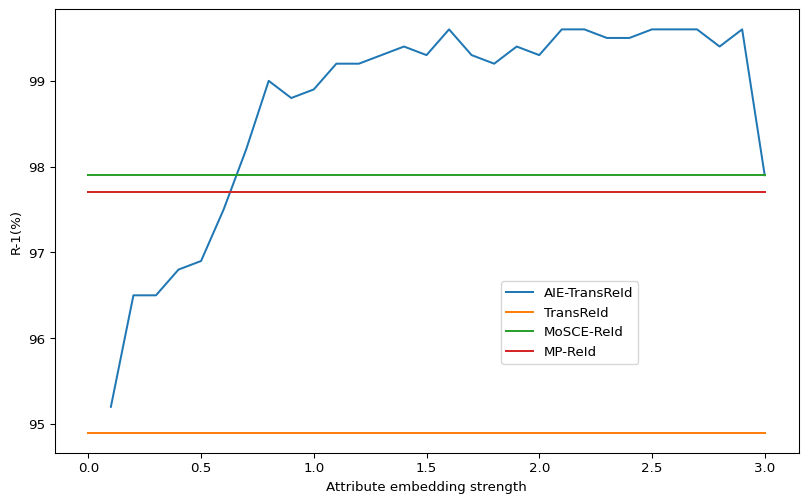

In [6]:
plt.figure(figsize=(10,6), dpi=96)
plt.plot(Lambda[:30], R1[:30], label='AIE-TransReId')
plt.plot([0, 3], [94.9, 94.9], label='TransReId')
plt.plot([0, 3], [97.9, 97.9], label='MoSCE-ReId')
plt.plot([0, 3], [97.7, 97.7], label='MP-ReId')
plt.xlabel('Attribute embedding strength')
plt.ylabel('R-1(%)')
plt.legend(loc=[.6,.2])